## Linear Models for Regression & Classification

<hr>

### Agenda
1. Simple Linear Regression using Ordinary Least Squares
2. Gradient Descent Algorithm
3. Regularized Regression Methods - Ridge, Lasso, ElasticNet
4. Logistic Regression for Classification
5. OnLine Learning Methods - Stochastic Gradient Descent & Passive Aggrasive
6. Robust Regression - Dealing with outliers & Model errors
7. Polynomial Regression
8. Bias-Variance Tradeoff

* Link https://www.slideshare.net/zekelabs/linear-regression-114293440

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Simple Linear Regression using Ordinary Least Squares

* Feature consist of p independent variables (p-dim)
* Target/dependent variable is represented by y
* Relation between feature & target is represented by the following equation
* w's represent weights or coef's for each feature, w0 is intercept 

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

In [73]:
from sklearn.linear_model import LinearRegression

* Residual Squared Sum (RSS) of Error - Sum of square of difference between actual value & predicted value

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

## 2. Gradient Descent

* LinearRegression tries to minimize RSS using <a href="https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html">Gradient Descent</a>. 
* The objective of Gradient Descent is the obtain best weights such that RSS is minimal.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/gd.PNG?raw=true" width="500">

### Understanding Math behind gradient descent with simplified notation
* Prediction, Yp = A + BX
* Actual, Y
* Simplified Loss for caclulation, Loss = 1/2 * Sum(YP - Y)^2
* Algorithm 
  - Randomly initialize weights A & B
  - Calculate gradient .i.e change in Loss when A & B are changed.
  - Change weights by gradients calculated & reduce the loss
  - Repeat the whole process till weights don't significantly reduce any further

#### Gradient calculation for A
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dda.png?raw=true" width="600px">

#### Gradient calculation for B
<img src="https://github.com/awantik/machine-learning-slides/blob/master/ddb.png?raw=true" width="800px">

<img src="https://github.com/awantik/machine-learning-slides/blob/master/gd-calc-g.png?raw=true">


* X = 1400; Y= 245000; a = 0.45; b = 0.75; m = total no.of data = 10

* Xs = (X - Xmin)/(Xmax - Xmin) = (1,400 - 1,100)/(2,450 - 1,100) = 0.22
* Ys = (Y - Xmin)/(Ymax - Ymin) = (245 - 199)/(405 - 199) = 0.22
* Yp = a + bXs = 0.45 + 0.75*(0.22) = 0.62
* Loss = (Y - Yp)^2 = (0.22 - 0.62)^2 = 0.16

* Gradients:	dMSE/da = (Yh - Y) = 0.4
* dMSE/db = (Yh - Y)*Xs = 0.088

* MSE = (1/2*m)*sum(Loss) = 0.0673 

#### Calculating new weights
* a = a - alfa*dMSE/da
* b = b - alfa*dMSE/db
* learning rate or jump size, alpha = 0.01 (usually default value)
* a = 0.45 - 0.01* 3.3 = 0.42
* b = 0.75 - 0.01* 1.545 = 0.73

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Genrating Regression Dataset
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [75]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

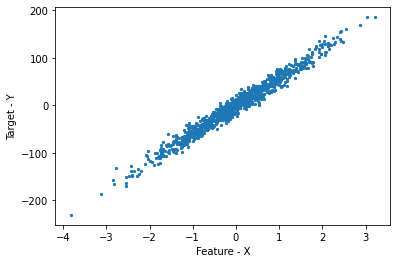

In [76]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

* Hyper-parameters are initial configuration of Models
* Initialize LinearRegression model with default hyper-parameters

In [77]:
lr = LinearRegression()

#### Common Hyperparameters
* fit_interceprt - Whether to calculate intercept for the model, not required if data is centered
* normalize - X will be normalized by subtracting mean & dividing by standard deviation

* <b>PS: By stanrdadizing data before subjecting to model, coef's tells the importance of features</b>

#### Common Attributes
* coef - weights for each independent variables
* intercept - bias of independent term of linear models

#### Common Functions
* fit - trains the model. Takes X & Y
* predict - Once model is trained, for given X using predict function Y can be predicted

#### Multiple Target
* Y can be of more than 1 dimension
* Advantages of multiple target are 
  - computationally fast
  - model is optimized for multiple targets
  - model do not use relationship between targets
  - model is more interpretable
  
<hr/>

### Training model
* X should be in rows of data format, X.ndim == 2
* Y should be 1D for simgle target & 2D for more than one target
* fit function for training the model

In [78]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lr.coef_

array([58.04418922])

In [80]:
lr.intercept_

0.24739728299710462

### Predicting using trained model

In [81]:
pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

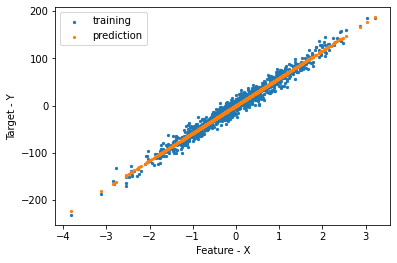

In [82]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#### Limitation of Ordinary Least Square Technique
* Impacted by Outliers
* Non-linearities 
* Too many independent variables
* Multicollinearity 
* Heteroskedasticity
* Noise in the Independent Variables
* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

## 3. Regularized Regression Methods 
### Ridge Regression
* Ridge Regression imposes penalty on size of coef.
* Less impacted by outliers.

#### Adding outliers to data

In [83]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
ridge.coef_

array([0.44186047, 0.44186047])

In [85]:
lr.coef_

array([0.475, 0.475])

In [86]:
outliers = Y[950:] - 600

In [87]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

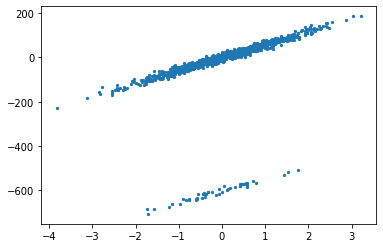

In [88]:
plt.scatter(X,Y_Out,s=5)

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X,Y_Out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

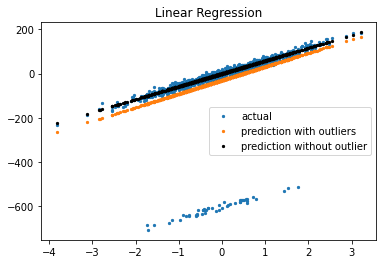

In [92]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [93]:
lr.coef_

array([61.33270294])

In [94]:
from sklearn.linear_model import Ridge

In [95]:
ridge = Ridge(alpha=1000)

In [96]:
ridge.fit(X,Y_Out)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

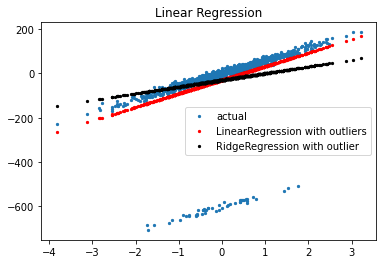

In [98]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [99]:
ridge.coef_

array([30.37484022])

### Effects of alpha using Ridge on Coeficients 
* Data generation

In [100]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [101]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
* Coefs calculated are appended to a list
* Generate 20 alphas from 10^-6 to 10^6

In [102]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [103]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
* Different colors represents different coefs

#### Conclusion
* As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
* For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

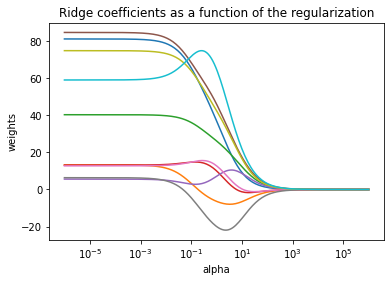

In [104]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Lasso
* Linear model that predict's sparse coefs
* Reduces the regressors predicting target

In [105]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
lasso.coef_

array([0.5, 0. ])

### Elastic Net   

* Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [107]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=.1)

In [108]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
en.coef_

array([0.32589556, 0.32579954])

## 4. Logistic Regression
* Linear Model of classification, assumes linear relationship between feature & target
* y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))
* Returns class probabilities
* Hyperparameter : C - regularization coef
* Fundamentally suited for bi-class classification

In [110]:
from sklearn.datasets import make_blobs

In [111]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=2,centers=2)

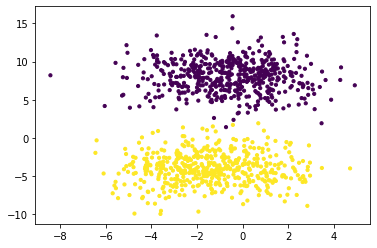

In [112]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [113]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [114]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

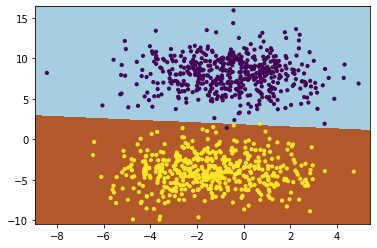

In [116]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

## 5. Online Learning Models
* Stochastic Gradient Descent & Passive Aggrasive Algorithms
* Simple & Efficient to fit linear models
* Useful where number of samples is very large ( Scale of 10^5 ) 
* Supports partial_fit for out-of-core learning
* Both the algorithms support regression & classification

In [117]:
from sklearn.datasets import make_classification, make_regression

In [118]:
X,y = make_classification(n_classes=2,n_features=10,n_samples=10000)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
trainX,testX, trainY,testY = train_test_split(X,y)

In [121]:
from sklearn.linear_model import SGDClassifier

In [122]:
sgd = SGDClassifier(max_iter=10)

In [123]:
sgd.partial_fit(trainX[:1500],trainY[:1500], classes=[0,1])
sgd.score(testX,testY)

0.884

In [124]:
sgd.partial_fit(trainX[1500:5000],trainY[1500:5000])
sgd.score(testX,testY)

0.8876

### 6. Robust Regression
* Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
* Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor

#### Comparisions RANSAC, Theil Sen, HuberRegressor
* HuberRegressor should be faster than RANSAC 
* Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
* RANSAC will deal better with large outliers in the y direction
* RANSAC is faster than Theil Sen and scales much better with the number of samples
* RANSAC is a good default option

In [125]:
n_samples = 1000
n_outliers = 50
X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [126]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

In [127]:
lr = LinearRegression()
lr.fit(X, y)
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

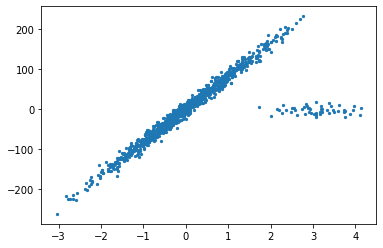

In [128]:
plt.scatter(X,y,s=5)

In [129]:
ransac_pred = ransac.predict(X)

In [130]:
lr_pred = lr.predict(X)

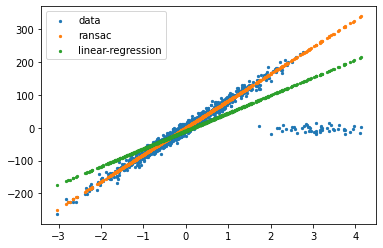

In [131]:
plt.scatter(X,y,s=5, label='data')
plt.scatter(X,ransac_pred,s=5,label='ransac')
plt.scatter(X,lr_pred,s=5, label='linear-regression')
plt.legend()

## 7. Polynomial Regression
* Sometimes relationship between variables & target is of higher polynomial degree
* Transformer can be used to convert data to higher degree
* Linear models can predict coef of these higher degree polynomials

In [132]:
from sklearn.datasets import make_circles

In [133]:
X,y = make_circles(n_samples=1000, noise=.04)

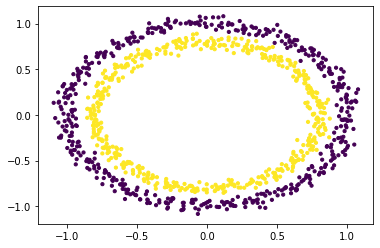

In [134]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
pol = PolynomialFeatures(degree=2)

In [137]:
X_tf = pol.fit_transform(X)

In [138]:
lr = LogisticRegression()

In [139]:
trainX,testX,trainY,testY = train_test_split(X_tf,y)

In [140]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
lr.score(testX,testY)

0.996

In [142]:
lr.coef_

array([[-1.13886114e-04, -4.92207798e-02,  4.62984031e-02,
        -9.48481162e+00, -1.29156437e-01, -9.35699000e+00]])

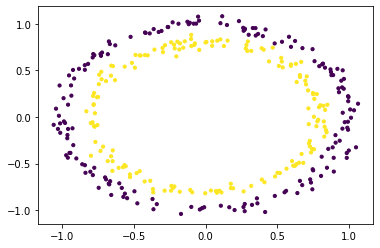

In [143]:
last_data_X = X[::3]
lr_pred = lr.predict(pol.transform(last_data_X))
plt.scatter(last_data_X[:,0],last_data_X[:,1],c=lr_pred, s=10)

### 8. Bias Variance 

#### Bias
* Fitting training data poorly, but produce similar result outside training data
* we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
* Situation of underfitting.
*  a linear regression model would have high bias when trying to model a non-linear relationship.

#### Variance
* Building complex model that fits the training data well but many not work similar way of other dataset.
* Model is not generalized & is overfitting.

#### Bias Variance TradeOff
* Increasing the accuracy of the model will lead to less generalization of pattern outside training data. 
* Increasing the bias will decrease the variance. 
* Increasing the variance will decrease the bias.
* We have to get perfect balance of bias & variance

<img src="https://github.com/awantik/machine-learning-slides/blob/master/bv.PNG?raw=true">